### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



In [3]:
#Reading the dataset
dataset = pd.read_csv("data.csv")
df = pd.DataFrame(dataset)
print(df.head())



   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [4]:
print(df.dtypes)  # Check the data types



RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [5]:
# Drop unnecessary columns
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)



In [6]:
# Check for missing values
print(df.isnull().sum())


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [7]:
# Check the value counts for the 'Exited' column
print(df['Exited'].value_counts())

Exited
0    7963
1    2037
Name: count, dtype: int64


In [8]:
# Convert columns to appropriate data types if necessary
df['Geography'] = df['Geography'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Tenure'] = df['Tenure'].astype('int64')
df['NumOfProducts'] = df['NumOfProducts'].astype('int64')
df['HasCrCard'] = df['HasCrCard'].astype('int64')
df['IsActiveMember'] = df['IsActiveMember'].astype('int64')
df['Exited'] = df['Exited'].astype('int64')

In [9]:
# Verify the data types after conversion
print(df.dtypes)

CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited                int64
dtype: object


In [10]:
def print_unique_values():
    """
    Prints the unique values of various columns in the DataFrame 'df'.

    Columns:
    - 'Geography'
    - 'Gender'
    - 'Tenure'
    - 'NumOfProducts'
    - 'HasCrCard'
    - 'IsActiveMember'
    - 'Exited'
    """
    print(df['Geography'].unique())
    print(df['Gender'].unique())
    print(df['Tenure'].unique())
    print(df['NumOfProducts'].unique())
    print(df['HasCrCard'].unique())
    print(df['IsActiveMember'].unique())
    print(df['Exited'].unique())


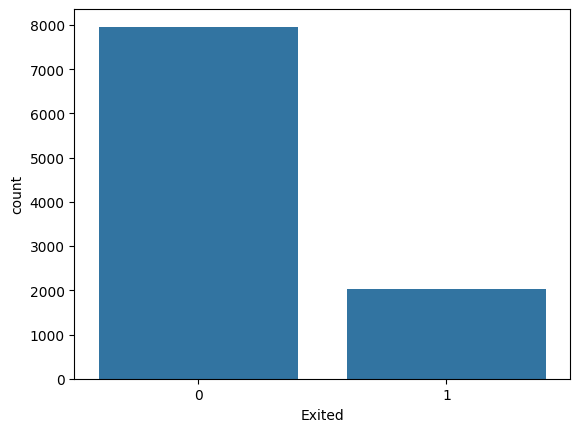

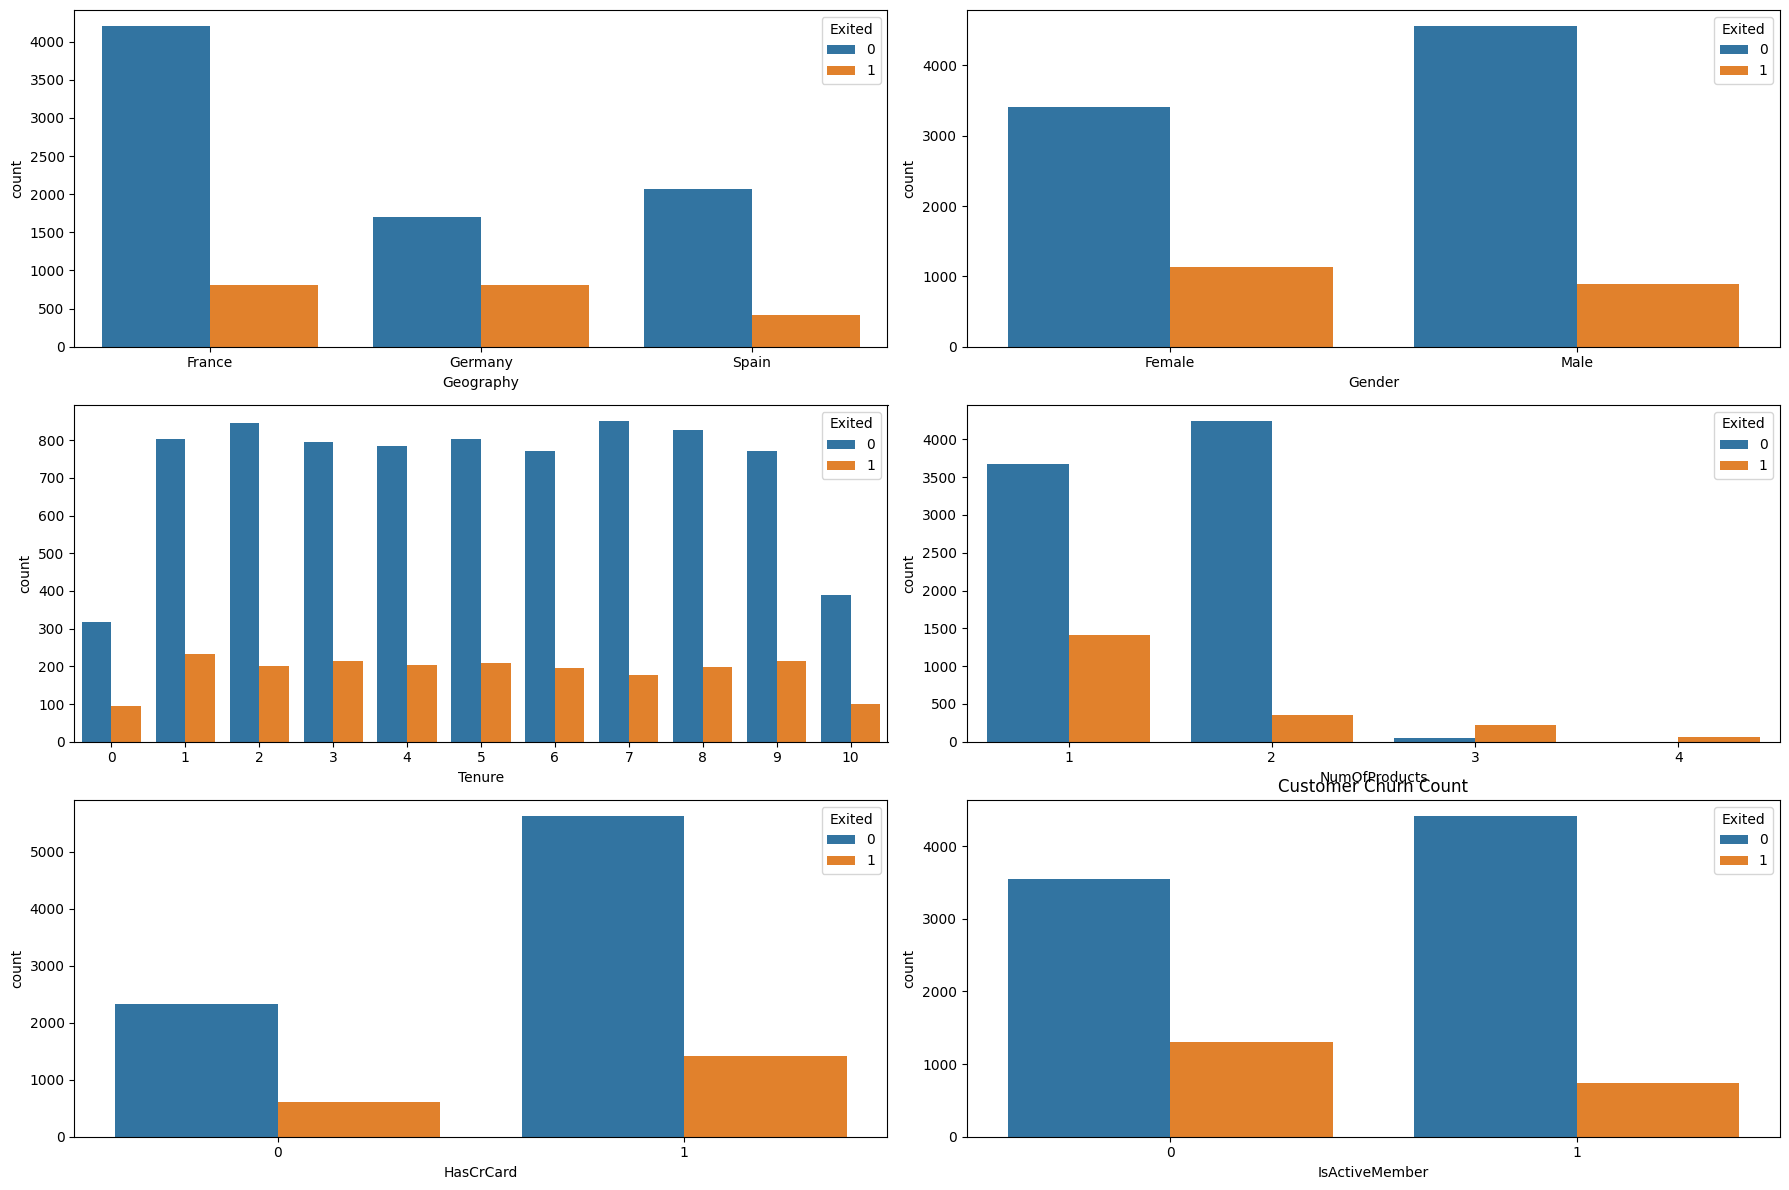

In [11]:
# Plot the data
sns.countplot(data=df, x='Exited')
fig, ax = plt.subplots(3, 2, figsize=(18, 12))

sns.countplot(x='Geography', hue='Exited', data=df, ax=ax[0][0])
sns.countplot(x='Gender', hue='Exited', data=df, ax=ax[0][1])
sns.countplot(x='Tenure', hue='Exited', data=df, ax=ax[1][0])
sns.countplot(x='NumOfProducts', hue='Exited', data=df, ax=ax[1][1])
sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=ax[2][0])
sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=ax[2][1])

plt.tight_layout()
plt.title('Customer Churn Count')
plt.show()

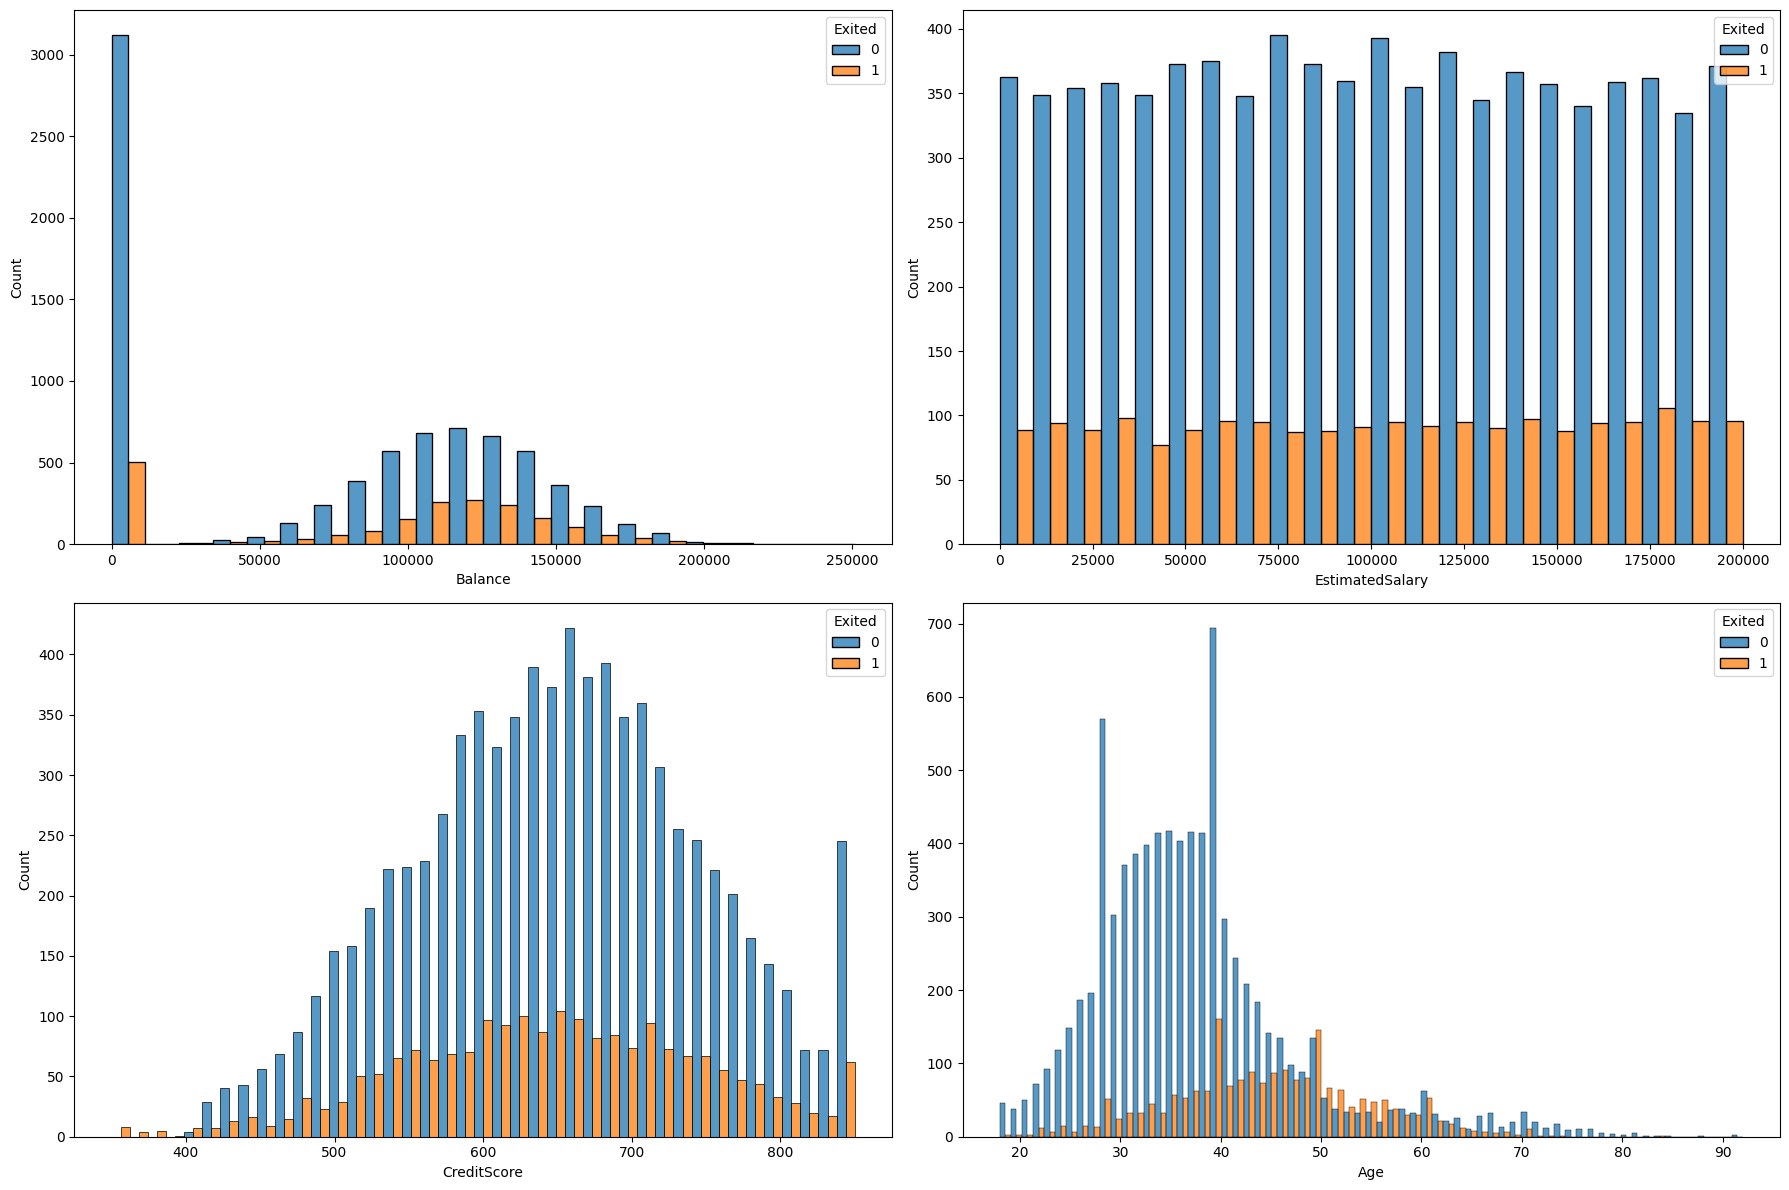

In [12]:
# Create subplots for histograms
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot the histograms
sns.histplot(data=df, x='Balance', hue='Exited', ax=axes[0][0], multiple="dodge")
sns.histplot(data=df, x='EstimatedSalary', hue='Exited', ax=axes[0][1], multiple="dodge")
sns.histplot(data=df, x='CreditScore', ax=axes[1][0], hue='Exited', multiple="dodge")
sns.histplot(data=df, x='Age', ax=axes[1][1], hue='Exited', multiple="dodge")

plt.tight_layout()
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [14]:
features = ['Geography', 'Gender']
for f in features:
    df[f] = encoder.fit_transform(df[f])

In [15]:
from tensorflow.keras.utils import to_categorical

X = df.drop('Exited', axis = 1)
y = to_categorical(df['Exited'])

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [17]:


from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [18]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor="val_accuracy", patience=15, mode=max)

C:\Users\Rahman Mabano\AppData\Local\Temp\ipykernel_21132\3458951293.py:3: UserWarning: EarlyStopping mode <built-in function max> is unknown, fallback to auto mode.
  es = EarlyStopping(monitor="val_accuracy", patience=15, mode=max)


In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

# initializing ann
model = Sequential()

model.add(Dense(16, activation = 'relu', input_shape = (10, )))
model.add(Dropout(rate = 0.1))

model.add(Dense(8, activation = 'relu'))
model.add(Dropout(rate = 0.1))


model.add(Dense(2, activation = 'softmax'))

# compiling the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# fitting the model to the training set 

history = model.fit(X_train, y_train, validation_split = 0.20, epochs = 100, 
                          callbacks=[es])

c:\Users\Rahman Mabano\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7424 - loss: 0.5691 - val_accuracy: 0.8113 - val_loss: 0.4690
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7992 - loss: 0.4674 - val_accuracy: 0.8160 - val_loss: 0.4418
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.8071 - loss: 0.4478 - val_accuracy: 0.8200 - val_loss: 0.4262
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.8154 - loss: 0.4325 - val_accuracy: 0.8253 - val_loss: 0.4203
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8158 - loss: 0.4279 - val_accuracy: 0.8293 - val_loss: 0.4111
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.8289 - loss: 0.4203 - val_accuracy: 0.8347 - val_loss: 0.4041
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8176 - loss: 0.4149 - val_accuracy: 0.8387 - val_loss: 0.3993
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8148 - loss: 0.4247 - va

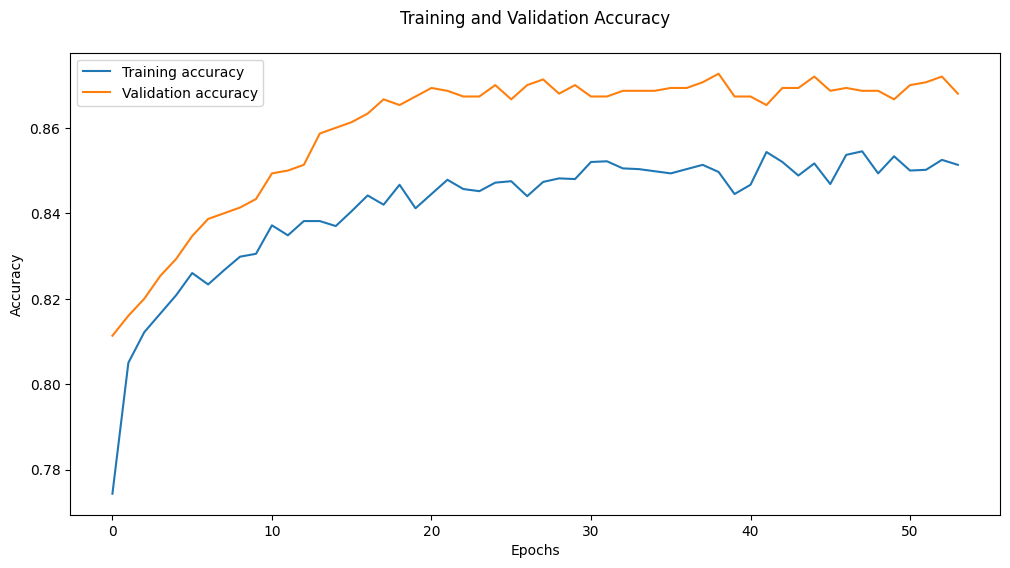

In [20]:
plt.figure(figsize = (12, 6))

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy'] 
epoch = range(len(train_accuracy))
plt.plot(epoch, train_accuracy, label = 'Training accuracy')
plt.plot(epoch, val_accuracy, label = 'Validation accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



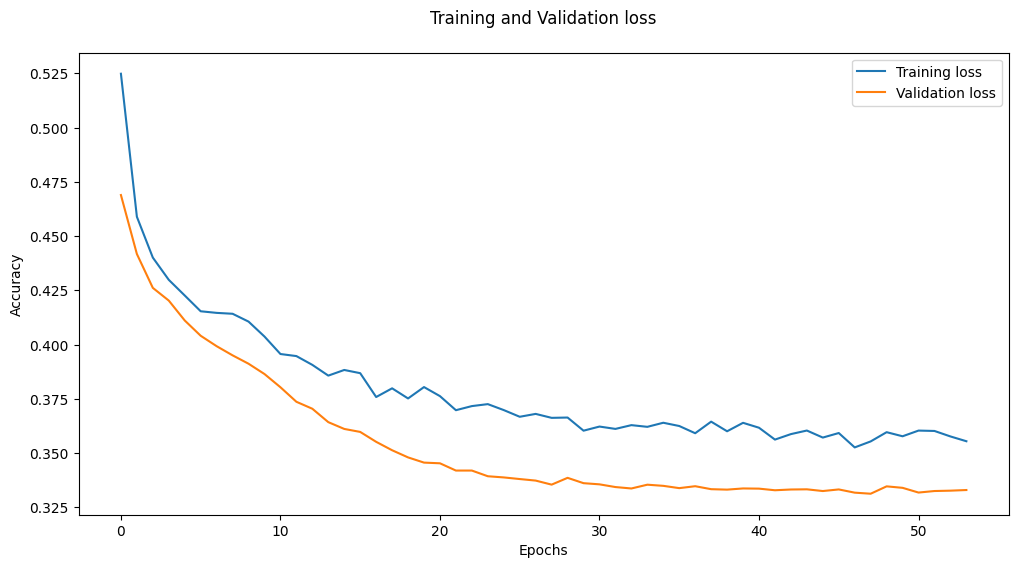

In [21]:
plt.figure(figsize = (12, 6))

train_loss = history.history['loss']
val_loss = history.history['val_loss'] 
epoch = range(len(train_loss))
plt.plot(epoch, train_loss, label = 'Training loss')
plt.plot(epoch, val_loss, label = 'Validation loss')
plt.title('Training and Validation loss\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
predictions = model.predict(X_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [23]:
predictions[:5]

array([[0.95174134, 0.0482587 ],
       [0.8945193 , 0.1054807 ],
       [0.9909038 , 0.00909625],
       [0.39617845, 0.6038216 ],
       [0.8563107 , 0.14368926]], dtype=float32)

In [24]:
y_test[:5]


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

### Balance Dataset

In [25]:
df = pd.DataFrame(dataset)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [27]:
features = ['Geography', 'Gender']
for f in features:
    df[f] = encoder.fit_transform(df[f])



In [28]:
from sklearn.utils import resample

class_not_exited = df[df['Exited'] == 0]
class_exited = df[df['Exited'] == 1]

In [29]:
n_samples = class_exited.shape[0]
majority_downsampled = resample(class_not_exited, replace=False, n_samples=n_samples, random_state=42)
balanced_data = pd.concat([class_exited, majority_downsampled])

# Shuffle the DataFrame
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)



In [30]:
balanced_data.shape

(4074, 11)

In [31]:
from tensorflow.keras.utils import to_categorical

X = df.drop('Exited', axis = 1)
y = to_categorical(df.Exited)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)



In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

# initializing ann
model = Sequential()

model.add(Dense(16, activation = 'relu', input_shape = (10, )))
model.add(Dropout(rate = 0.1))

model.add(Dense(8, activation = 'relu'))
model.add(Dropout(rate = 0.1))

model.add(Dense(2, activation = 'softmax'))

# compiling the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# fitting the model to the training set 

history = model.fit(X_train, y_train, validation_split = 0.20, epochs = 100, 
                          callbacks=[es])


Epoch 1/100


c:\Users\Rahman Mabano\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7684 - loss: 0.5476 - val_accuracy: 0.8000 - val_loss: 0.4588
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.8063 - loss: 0.4642 - val_accuracy: 0.8080 - val_loss: 0.4280
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 0.8072 - loss: 0.4438 - val_accuracy: 0.8167 - val_loss: 0.4175
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.8177 - loss: 0.4250 - val_accuracy: 0.8273 - val_loss: 0.4115
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.8066 - loss: 0.4382 - val_accuracy: 0.8260 - val_loss: 0.4045
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.8286 - loss: 0.4083 - val_accuracy: 0.8333 - val_loss: 0.4003
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8242 - loss: 0.4125 - val_accuracy: 0.8360 - val_loss: 0.3955
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8339 - loss: 0.4123 - val_accura

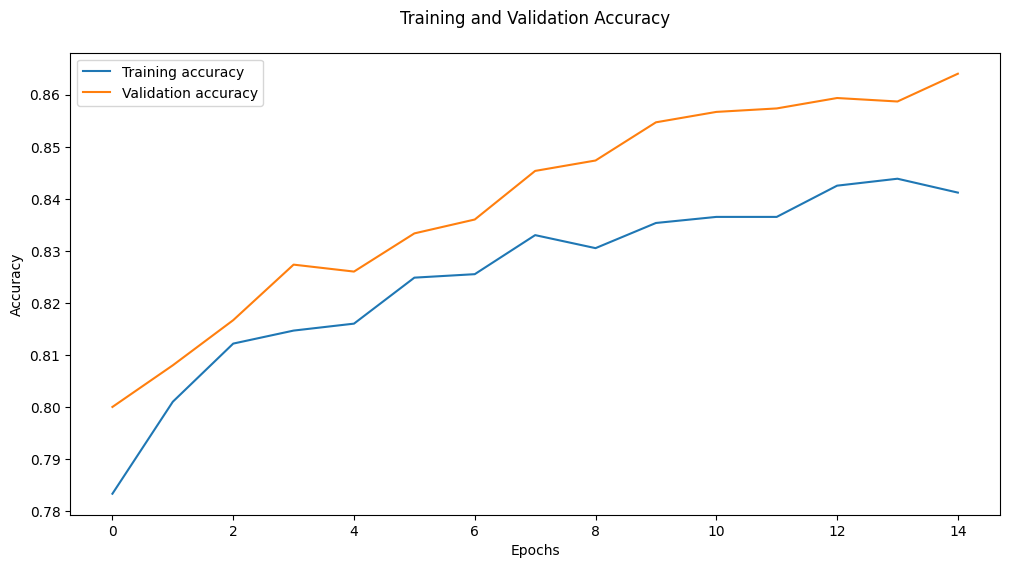

In [35]:
plt.figure(figsize = (12, 6))

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy'] 
epoch = range(len(train_accuracy))
plt.plot(epoch, train_accuracy, label = 'Training accuracy')
plt.plot(epoch, val_accuracy, label = 'Validation accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



Balancing the dataset did not yield any benefits. We can use whole dataset.


In [36]:


import matplotlib.pyplot as plt

def plot_loss(history):
    """
    Plots the training and validation loss over epochs.

    Parameters:
    - history: The history object returned by the model.fit() function.

    Returns:
    - None
    """
    plt.figure(figsize=(12, 6))

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epoch = range(len(train_loss))
    plt.plot(epoch, train_loss, label='Training loss')
    plt.plot(epoch, val_loss, label='Validation loss')
    plt.title('Training and Validation loss\n')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()



In [37]:
import keras_tuner
from tensorflow.keras import layers 

def build_model(hp):
    model = keras.Sequential()
    
    model.add(
        layers.Dense(
            # Tune number of units.
            units=hp.Int("units_1", min_value=4, max_value=24, step=4),
            # Tune the activation function to use.
            activation=hp.Choice("activation_1", ["relu", "elu", "tanh"]),
        )
    )
    # Tune whether to use dropout.
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.25))
        
    model.add(
    layers.Dense(
        # Tune number of units.
        units=hp.Int("units_2", min_value=4, max_value=24, step=4),
        # Tune the activation function to use.
        activation=hp.Choice("activation_2", ["relu", "elu", "tanh"]),
        )
    )
    # Tune whether to use dropout.
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.25))

        
    model.add(Dense(2, activation = 'softmax'))    
        
    # Define the optimizer learning rate as a hyperparameter.
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model


build_model(keras_tuner.HyperParameters())

<Sequential name=sequential_2, built=False>

In [38]:
build_model(keras_tuner.HyperParameters())

<Sequential name=sequential_3, built=False>

In [39]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=10,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="churner",
)

In [40]:
tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[keras.callbacks.TensorBoard("/tmp/tb_logs")])

Trial 10 Complete [00h 00m 16s]
val_accuracy: 0.848800003528595

Best val_accuracy So Far: 0.8540000021457672
Total elapsed time: 00h 04m 34s
